**Mounting the Google Drive**

In [ ]:
#Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the necessary libraries
import os
import cv2
import numpy as np

In [ ]:
datasetPath='/content/drive/MyDrive/Dataset2'
classes=os.listdir(datasetPath)
print(classes)

['Car', 'Fruit', 'Dog', 'Human', 'Bike']


There are total of Five classes of images.

1. Car
2. Fruit
3. Dog
4. Human
6. Bike


Applying the LOCAL BINARY PATTERN(LBP)Feature Extraction Technique


Local Binary Pattern (LBP) is a texture descriptor used in image processing for feature extraction. It converts an image into a binary pattern by comparing each pixel’s intensity with its surrounding neighbors. If a neighboring pixel is greater than or equal to the center pixel, it is assigned 1; otherwise, it is assigned 0. These binary values form a unique LBP code for each pixel, which is then used to create a histogram representing the image’s texture. LBP is widely used in facial recognition, texture classification, and image retrieval due to its simplicity, efficiency, and rotational invariance.

In [ ]:
from skimage.feature import local_binary_pattern

#Applying the Local Binary Pattern using the library function
def LBP(image):
  #Applying the LBP to the gray scale
  if (len(image.shape)==3):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  localBinaryPattern=local_binary_pattern(image,P=8,R=1,method="uniform")

  #creating the histogram for the feature and then normalizing
  histogram,_=np.histogram(localBinaryPattern,bins=np.arange(0,11),range=(0,10))
  histogram=histogram.astype("float")
  histogram=histogram/(histogram.sum()+1e-6)
  return histogram


In [ ]:
#LBP function without using any library
def LBP_manual(image):
    if len(image.shape)==3:
        image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rows,cols=image.shape
    lbp_image=np.zeros((rows, cols),dtype=np.uint8)
    offsets=[(-1,-1),(-1,0),(-1,1),(0,-1),(0,1),(1,-1),(1,0),(1,1)]
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            center=image[i,j]
            binary_string=""
            for dx,dy in offsets:
                neighbor=image[i + dx, j + dy]
                binary_string+='1' if neighbor >= center else '0'
            lbp_value=int(binary_string, 2)
            lbp_image[i,j]=lbp_value
    histogram,_ =np.histogram(lbp_image.ravel(), bins=np.arange(0, 257), range=(0, 256))
    histogram=histogram.astype("float")
    histogram/=(histogram.sum()+1e-6)
    return histogram

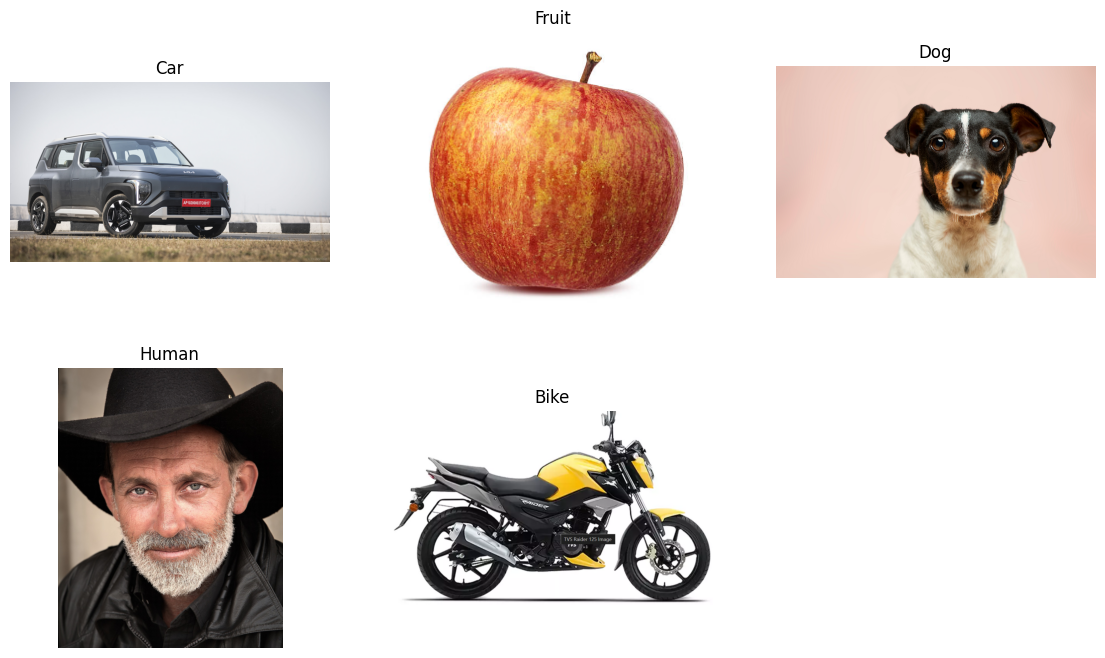

In [ ]:
#Visualising some images from the datasest and creating the feature vector with the LBP library function
import matplotlib.pyplot as plt
features,labels=[],[]
plt.figure(figsize=(14,8))

for i,className in enumerate(classes):
  classPath=os.path.join(datasetPath,className)
  imageName=os.listdir(classPath)

  imagePath=os.path.join(classPath,imageName[0])
  image=cv2.imread(imagePath)

  if image is None:
    print(f"Image is not found at the loction {imagePath}")
  else:
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(className)
    plt.axis("off")

  #Extracting the feature using the LBP
  for image_name in imageName:
        image_path=os.path.join(classPath,image_name)
        image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Warning: Unable to load image {image_path}")
            continue
        feature=LBP(image)
        features.append(feature)
        labels.append(className)

plt.show()


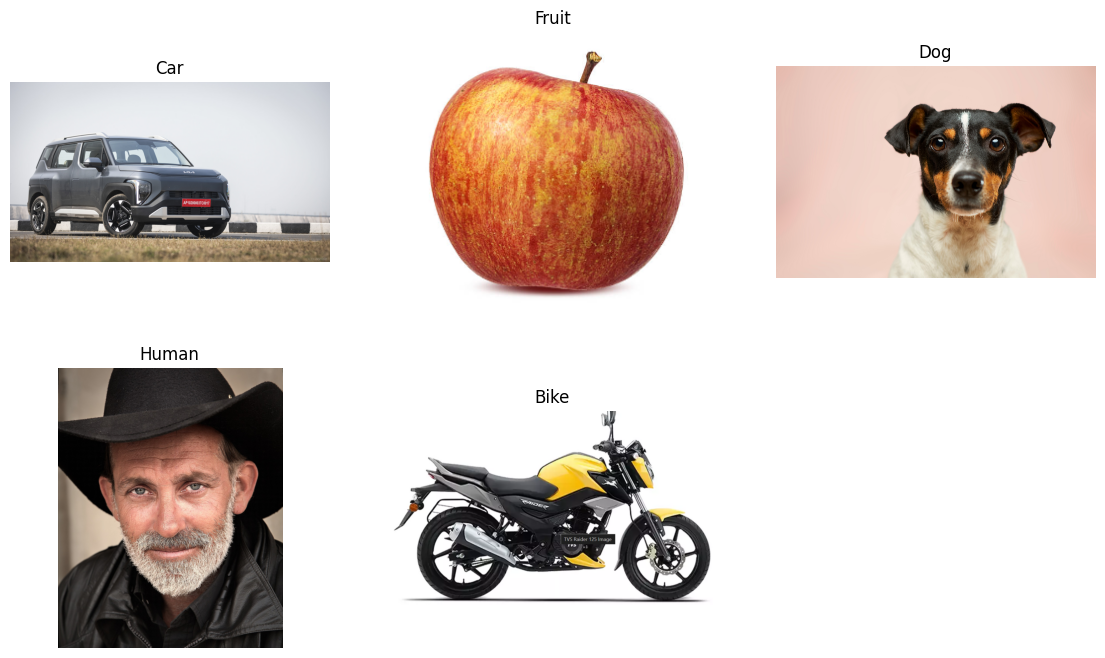

In [ ]:
#creating the feature vector using the LBP self written function
features1,labels1=[],[]
plt.figure(figsize=(14,8))

for i,className in enumerate(classes):
  classPath=os.path.join(datasetPath,className)
  imageName=os.listdir(classPath)

  imagePath=os.path.join(classPath,imageName[1])
  image=cv2.imread(imagePath)

  if image is None:
    print(f"Image is not found at the loction {imagePath}")
  else:
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(className)
    plt.axis("off")

  #Extracting the feature using the LBP_manual
  for image_name in imageName:
        image_path=os.path.join(classPath,image_name)
        image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Warning: Unable to load image {image_path}")
            continue
        feature=LBP_manual(image)
        features1.append(feature)
        labels1.append(className)

plt.show()

In [ ]:
#Converting the features,labels as array
features=np.array(features)
labels=np.array(labels)
features1=np.array(features1)
labels1=np.array(labels1)

In [ ]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,random_state=40)
X_train1,X_test1,y_train1,y_test1=train_test_split(features1,labels1,test_size=0.2,random_state=43)

In [ ]:
#Training the KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy * 100:.2f}%")


Accuracy:60.00%


In [ ]:
#Training the second KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn1=KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train1,y_train1)
y_pred1=knn1.predict(X_test1)
accuracy=accuracy_score(y_test1, y_pred1)
print(f"Accuracy:{accuracy * 100:.2f}%")

Accuracy:45.00%


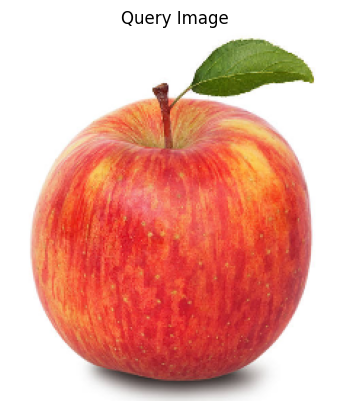

In [ ]:
query_image_path = "/content/drive/MyDrive/Dataset2/Fruit/F_img (3).png"
query_image = cv2.imread(query_image_path)

if query_image is None:
    print("Error: Unable to load query image.")
else:
    plt.imshow(cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB))
    plt.title("Query Image")
    plt.axis("off")
    plt.show()


In [ ]:
K=int(input("Enter the Number of Results that you want to see : "))

Enter the Number of Results that you want to see : 2


In [ ]:
def displayResult(knn, query_feature, y_train, datasetPath, K):
    distances, indices = knn.kneighbors([query_feature], n_neighbors=K)

    plt.figure(figsize=(10, 5))
    unique_images = set()

    for idx in indices[0]:
        class_name = y_train[idx]
        class_path = os.path.join(datasetPath, class_name)

        if not os.path.exists(class_path):
            print(f"Warning: Class path {class_path} does not exist.")
            continue

        image_names = os.listdir(class_path)
        for image_name in image_names:
            image_path = os.path.join(class_path, image_name)
            if image_path not in unique_images:
                unique_images.add(image_path)
                break

        if len(unique_images) >= K:
            break
    for i, image_path in enumerate(list(unique_images)[:K]):
        similar_image = cv2.imread(image_path)
        if similar_image is None:
            print(f"Warning: Unable to load similar image {image_path}")
        else:
            plt.subplot(1, K, i + 1)
            plt.imshow(cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB))
            plt.title(f"Neighbor {i + 1}")
            plt.axis("off")
    plt.show()

Enter the Number of Results that you want to see : 6


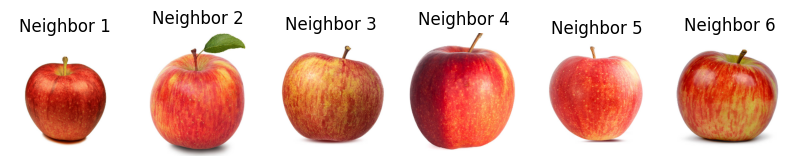

In [ ]:
query_feature = LBP(query_image)
K=int(input("Enter the Number of Results that you want to see : "))
displayResult(knn,query_feature,y_train,datasetPath,K)

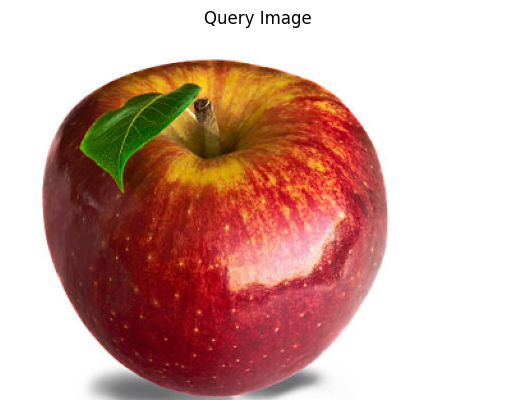

In [ ]:
query_image_path = "/content/drive/MyDrive/Dataset2/Fruit/F_img (10).png"
query_image = cv2.imread(query_image_path)

if query_image is None:
    print("Error: Unable to load query image.")
else:
    plt.imshow(cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB))
    plt.title("Query Image")
    plt.axis("off")
    plt.show()

Enter the Number of Results that you want to see : 7


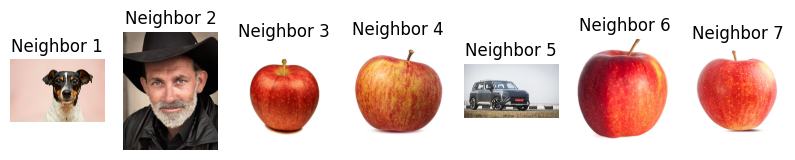

In [ ]:
query_feature = LBP(query_image)
K=int(input("Enter the Number of Results that you want to see : "))
displayResult(knn,query_feature,y_train,datasetPath,K)

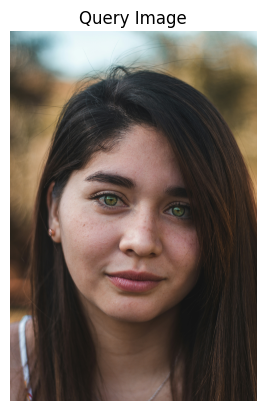

Enter the Number of Results that you want to see : 7


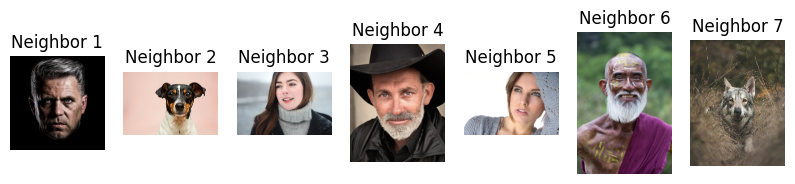

In [ ]:
query_image_path = "/content/drive/MyDrive/Dataset2/Human/H_img (4).jpg"
query_image = cv2.imread(query_image_path)

if query_image is None:
    print("Error: Unable to load query image.")
else:
    plt.imshow(cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB))
    plt.title("Query Image")
    plt.axis("off")
    plt.show()
query_feature = LBP(query_image)
K=int(input("Enter the Number of Results that you want to see : "))
displayResult(knn,query_feature,y_train,datasetPath,K)

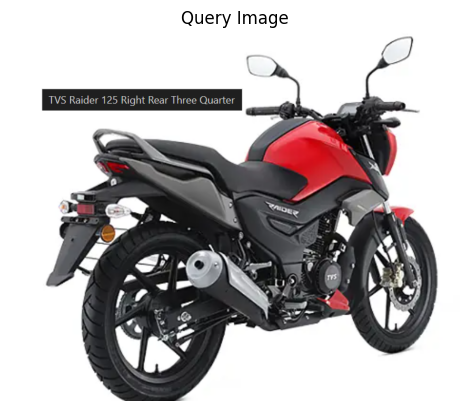

Enter the Number of Results that you want to see : 4


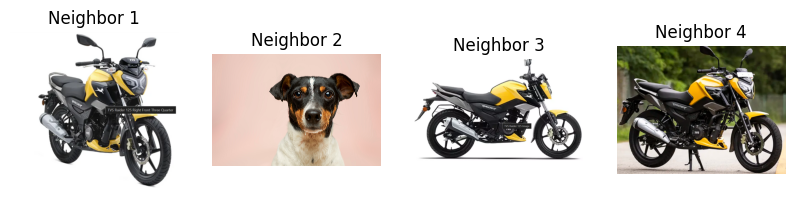

In [ ]:
query_image_path = "/content/drive/MyDrive/Dataset2/Bike/B_img (10).png"
query_image = cv2.imread(query_image_path)

if query_image is None:
    print("Error: Unable to load query image.")
else:
    plt.imshow(cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB))
    plt.title("Query Image")
    plt.axis("off")
    plt.show()
query_feature = LBP(query_image)
K=int(input("Enter the Number of Results that you want to see : "))
displayResult(knn,query_feature,y_train,datasetPath,K)

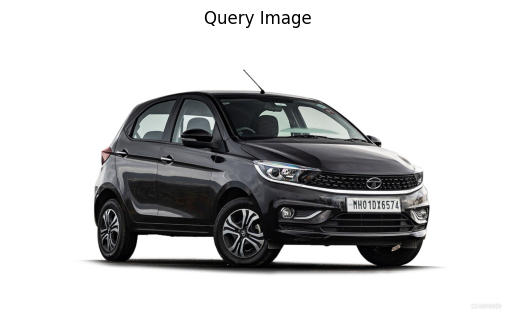

Enter the Number of Results that you want to see : 7


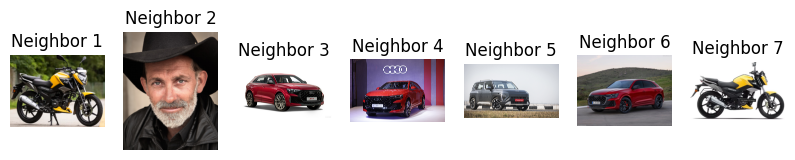

In [ ]:
query_image_path = "/content/drive/MyDrive/Dataset2/Car/C_img (15).jpeg"
query_image = cv2.imread(query_image_path)

if query_image is None:
    print("Error: Unable to load query image.")
else:
    plt.imshow(cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB))
    plt.title("Query Image")
    plt.axis("off")
    plt.show()
query_feature = LBP(query_image)
K=int(input("Enter the Number of Results that you want to see : "))
displayResult(knn,query_feature,y_train,datasetPath,K)

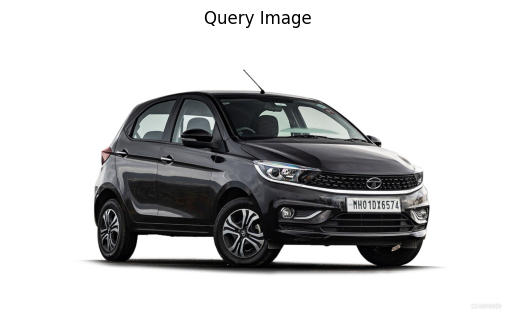

Enter the Number of Results that you want to see : 5


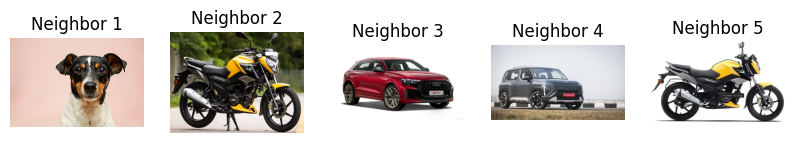

In [ ]:
query_image_path = "/content/drive/MyDrive/Dataset2/Car/C_img (15).jpeg"
query_image = cv2.imread(query_image_path)

if query_image is None:
    print("Error: Unable to load query image.")
else:
    plt.imshow(cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB))
    plt.title("Query Image")
    plt.axis("off")
    plt.show()
query_feature1 = LBP_manual(query_image)
K=int(input("Enter the Number of Results that you want to see : "))
displayResult(knn1,query_feature1,y_train1,datasetPath,K)

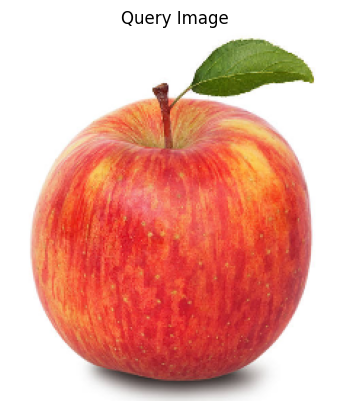

Enter the Number of Results that you want to see : 5


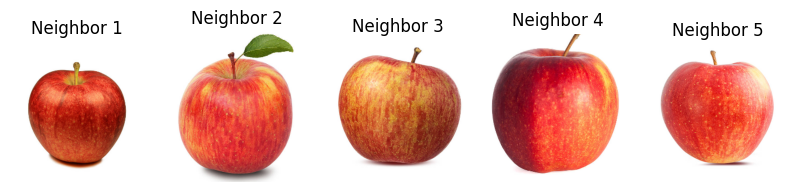

In [ ]:
query_image_path = "/content/drive/MyDrive/Dataset2/Fruit/F_img (3).png"
query_image = cv2.imread(query_image_path)

if query_image is None:
    print("Error: Unable to load query image.")
else:
    plt.imshow(cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB))
    plt.title("Query Image")
    plt.axis("off")
    plt.show()
query_feature1 = LBP_manual(query_image)
K=int(input("Enter the Number of Results that you want to see : "))
displayResult(knn1,query_feature1,y_train1,datasetPath,K)

# Using Local Ternary Pattern for the feature extraction and then applying the KNN algorithm for the classification


In [ ]:
#Function to extract the feature using the LTP
def LTP(image, threshold=5):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    rows, cols = image.shape
    ltp_pos = np.zeros((rows, cols), dtype=np.uint8)
    ltp_neg = np.zeros((rows, cols), dtype=np.uint8)

    offsets = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            center = image[i, j]
            pos_bin = ""
            neg_bin = ""

            for dx, dy in offsets:
                neighbor = image[i + dx, j + dy]
                if neighbor >= center + threshold:
                    pos_bin += '1'
                    neg_bin += '0'
                elif neighbor <= center - threshold:
                    pos_bin += '0'
                    neg_bin += '1'
                else:
                    pos_bin += '0'
                    neg_bin += '0'

            ltp_pos[i, j] = int(pos_bin, 2)
            ltp_neg[i, j] = int(neg_bin, 2)

    hist_pos, _ = np.histogram(ltp_pos.ravel(), bins=np.arange(0, 257), range=(0, 256))
    hist_neg, _ = np.histogram(ltp_neg.ravel(), bins=np.arange(0, 257), range=(0, 256))

    hist = np.concatenate((hist_pos, hist_neg)).astype("float")
    hist /= (hist.sum() + 1e-6)  # Normalize histogram

    return hist

In [ ]:
from tqdm import tqdm
dataset_path = '/content/drive/MyDrive/Dataset2'
def load_dataset(dataset_path):
    features, labels = [], []
    class_labels = {folder: i for i, folder in enumerate(os.listdir(dataset_path))}

    for folder in tqdm(os.listdir(dataset_path), desc="Loading dataset"):
        class_path = os.path.join(dataset_path, folder)
        if not os.path.isdir(class_path):
            continue

        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if image is None:
                print(f"Skipping: {image_path}")
                continue

            features.append(LTP(image))
            labels.append(class_labels[folder])

    return np.array(features), np.array(labels)

# Load data
X, y = load_dataset(dataset_path)

Loading dataset: 100%|██████████| 5/5 [3:35:06<00:00, 2581.39s/it]


In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

Classification Accuracy: 50.00%


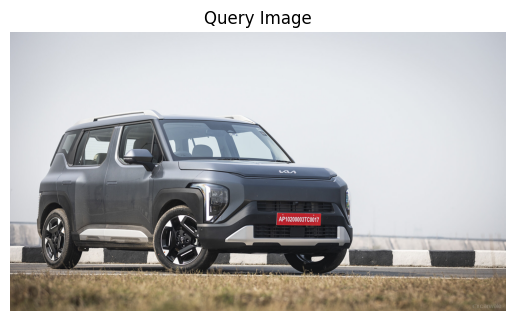

Predicted Class: Human
Enter the number of nearest results to display: 5

Top 5 nearest images:


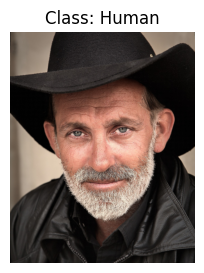

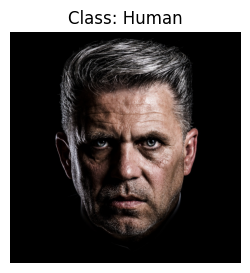

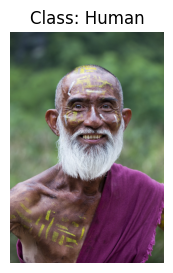

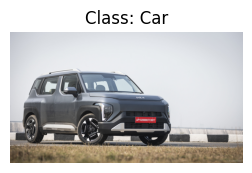

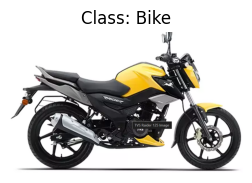

In [ ]:
# Load and display query image
query_image_path = "/content/drive/MyDrive/Dataset2/Car/C_img (11).jpeg"
query_image = cv2.imread(query_image_path)

if query_image is None:
    print("Error: Unable to load query image.")
else:
    plt.imshow(cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB))
    plt.title("Query Image")
    plt.axis("off")
    plt.show()

# Extract LTP features for query image
query_feature = LTP(query_image)

# Reshape query feature for KNN
query_feature = query_feature.reshape(1, -1)

# Predict class using KNN
predicted_label = knn.predict(query_feature)[0]

# Get class labels mapping
class_labels = {folder: i for i, folder in enumerate(os.listdir(datasetPath))}
reverse_class_labels = {v: k for k, v in class_labels.items()}

# Display prediction
predicted_class = reverse_class_labels[predicted_label]
print(f"Predicted Class: {predicted_class}")

# Find K nearest neighbors
K = int(input("Enter the number of nearest results to display: "))
distances, indices = knn.kneighbors(query_feature, n_neighbors=K)

# Function to display K nearest images without duplicates
def displayResult(knn, query_feature, datasetPath, K):
    """Displays the top K nearest images without duplicates."""
    print(f"\nTop {K} nearest images:")

    seen_images = set()  # To track displayed images

    for idx in indices[0]:  # Iterate through nearest neighbors
        folder_name = reverse_class_labels[y_train[idx]]
        class_folder = os.path.join(datasetPath, folder_name)

        # Get all images in the class folder
        image_files = os.listdir(class_folder)

        for image_name in image_files:
            image_path = os.path.join(class_folder, image_name)

            if image_path not in seen_images:  # Avoid duplicates
                seen_images.add(image_path)

                # Load and display the image
                neighbor_image = cv2.imread(image_path)
                neighbor_image = cv2.cvtColor(neighbor_image, cv2.COLOR_BGR2RGB)

                plt.figure(figsize=(3, 3))
                plt.imshow(neighbor_image)
                plt.title(f"Class: {folder_name}")
                plt.axis("off")
                plt.show()
                break

displayResult(knn, query_feature, datasetPath, K)
